# Breakdwon of mutations in library by type

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import warnings
import os
import functools
import upsetplot
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

warnings.filterwarnings('ignore')
plt.rc('font', family='Helvetica')

# Look at kinases, etc.

- Examine on kinase family map

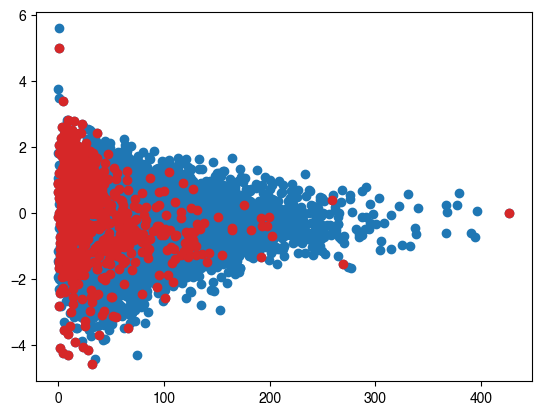

In [ ]:
ABE = pd.read_csv('ABE_LFC_FDR_df.csv')
CBE = pd.read_csv('CBE_LFC_FDR_df.csv')

sig_cutoff = .1
tissue = 'd15'

sig = CBE[CBE['FDR_spleen']<sig_cutoff]

plt.scatter(CBE['Input_median'], CBE[f'LFC_median_{tissue}'])
plt.scatter(sig['Input_median'], sig[f'LFC_median_{tissue}'], color='tab:red')


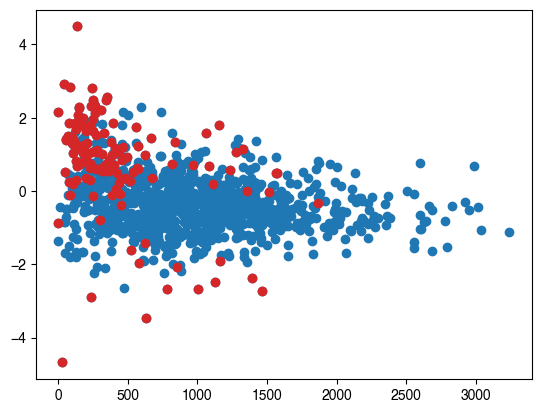

In [16]:
sig_cutoff = .1
tissue = 'bonemarrow'

sig = ABE[ABE['FDR_spleen']<sig_cutoff]

plt.scatter(ABE['Input_median'], ABE[f'LFC_median_{tissue}'])
plt.scatter(sig['Input_median'], sig[f'LFC_median_{tissue}'], color='tab:red')


In [ ]:
tissue = 'bonemarrow'

t1 = ABE.sort_values(by=f'LFC_median_{tissue}', ascending=False)

sns.barplot(x='gRNA_id', y=)

,gRNA_id,Gene,spleen1,spleen2,spleen3,spleen4,LFC_avg_spleen,LFC_median_spleen,Input_median,bonemarrow1,...,p_high_unadjusted_bonemarrow,p_low_unadjusted_bonemarrow,FDR_high_bonemarrow,FDR_low_bonemarrow,FDR_bonemarrow,p_high_unadjusted_meninges,p_low_unadjusted_meninges,FDR_high_meninges,FDR_low_meninges,FDR_meninges
919,gRNA_12164,Syk,3.314257,2.919457,2.704232,4.148897,3.271711,3.116857,135.796817,2.808886,...,2.046920e-15,1.000000e+00,2.190205e-12,1.000000e+00,2.190205e-12,3.094875e-07,0.999948,0.000331,0.999974,0.000331
299,gRNA_3084,Ep300,3.127945,3.297796,3.894166,3.144012,3.365980,3.220904,40.092394,3.379415,...,2.413847e-13,1.000000e+00,8.609387e-11,1.000000e+00,8.609387e-11,5.335775e-04,0.989269,0.035389,0.999974,0.035389
39,gRNA_895,Arid5b,2.306037,1.529527,2.245836,1.012394,1.773449,1.887682,85.357999,1.451724,...,1.264052e-10,9.999999e-01,2.254226e-08,1.000000e+00,2.254226e-08,2.011927e-04,0.998106,0.023920,0.999974,0.023920
527,gRNA_6087,Keap1,2.256604,2.399550,2.999630,2.681546,2.584332,2.540548,245.727573,2.072304,...,2.413847e-13,1.000000e+00,8.609387e-11,1.000000e+00,8.609387e-11,5.650796e-04,0.999809,0.035389,0.999974,0.035389
622,gRNA_7514,Myd88,1.358541,1.687669,2.169993,1.049380,1.566396,1.523105,352.175895,2.636308,...,4.305329e-10,9.999978e-01,6.581003e-08,1.000000e+00,6.581003e-08,3.155646e-01,0.488135,0.961978,0.999974,0.961978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,gRNA_2494,Ctnnb1,-2.238856,-3.021354,-3.591726,-3.351482,-3.050854,-3.186418,784.914902,-3.426294,...,9.999928e-01,4.854957e-08,1.000000e+00,1.298701e-05,1.298701e-05,9.999959e-01,0.000005,1.000000,0.002666,0.002666
803,gRNA_10623,Rhoa,-2.968384,-1.939712,-1.874001,-1.977613,-2.189928,-1.958663,1461.645053,-2.733042,...,9.999343e-01,2.006244e-06,1.000000e+00,2.683352e-04,2.683352e-04,9.408384e-01,0.175565,1.000000,0.750403,0.750403
1027,gRNA_13007,Vhl,-5.522186,-7.954741,-6.852688,-1.850604,-5.545055,-6.187437,235.136502,-3.947124,...,1.000000e+00,5.799816e-09,1.000000e+00,2.068601e-06,2.068601e-06,9.993494e-01,0.000028,1.000000,0.007599,0.007599
25,gRNA_671,Arid1a,-3.481979,-1.666607,-2.543993,-4.467769,-3.040087,-3.012986,628.853436,-3.886356,...,1.000000e+00,3.454832e-13,1.000000e+00,3.696671e-10,3.696671e-10,9.999999e-01,0.000012,1.000000,0.004426,0.004426


# Gene type classifications

In [205]:
#source: https://github.com/openkinome/kinodata/blob/master/data/KinHubKinaseList.csv
kinome = pd.read_csv('source_data/gene_classifications/KinHubKinaseList.csv').rename(columns = {'Manning\xa0Name':'Manning_Name','HGNC\xa0Name':'HGNC_Name',})

In [206]:
kinome_list = list(kinome['HGNC_Name'])
library = pd.read_csv('MBESv2_CORRECTED.csv')

library_targ = library[library['classification']=='targeting guide']
genes = np.unique(library_targ['gene_name_h'])

kinases_included = [x for x in genes if x in kinome_list]
len(kinases_included)

91

In [233]:
#cleaning up data/removing splice isoforms for simpler analysis
kins = kinome[kinome['HGNC_Name'].isin(kinases_included)]
remove_manning = ['Domain2_JAK1', 'Domain2_MSK2', 'Domain2_JAK2', 'Domain2_JAK3']
kins = kins[~kins['Manning_Name'].isin(remove_manning)].reset_index(drop=True)
u,c = np.unique(kins['Group'], return_counts=True)
num_genes_df = pd.DataFrame(dict(zip(['Group', 'No. of Genes'], [u,c])))
num_genes_df

,Group,No. of Genes
0,AGC,10
1,Atypical,6
2,CAMK,6
3,CMGC,7
4,Other,4
5,STE,5
6,TK,44
7,TKL,9


In [238]:
kins

,xName,Manning_Name,HGNC_Name,Kinase Name,Group,Family,SubFamily,UniprotID
0,ABL1,ABL,ABL1,Tyrosine-protein kinase ABL1,TK,Abl,NaN,P00519
1,AKT1,AKT1,AKT1,RAC-alpha serine/threonine-protein kinase,AGC,Akt,NaN,P31749
2,AKT2,AKT2,AKT2,RAC-beta serine/threonine-protein kinase,AGC,Akt,NaN,P31751
3,AKT3,AKT3,AKT3,RAC-gamma serine/threonine-protein kinase,AGC,Akt,NaN,Q9Y243
4,ALK,ALK,ALK,ALK tyrosine kinase receptor,TK,ALK,NaN,Q9UM73
...,...,...,...,...,...,...,...,...
86,SgK495,SgK495,STK40,Serine/threonine-protein kinase 40,CAMK,SgK495,NaN,Q8N2I9
87,KSR2,KSR2,KSR2,Kinase suppressor of Ras 2,TKL,RAF,NaN,Q6VAB6
88,SMG1,SMG1,SMG1,Serine/threonine-protein kinase SMG1,Atypical,PIKK,SMG1,Q96Q15
89,BRD4,BRD4,BRD4,BRD4 protein,Atypical,BRD,NaN,O60885


In [244]:
kinase_subset = library[library['gene_name_h'].isin(kinases_included)]

kinase_subset_ABE = kinase_subset[kinase_subset['Editor']=='ABE']
kinase_subset_CBE = kinase_subset[kinase_subset['Editor']=='CBE']

u,c = np.unique(kinase_subset_ABE['gene_name_h'], return_counts=True)
num_guides_df = pd.DataFrame(dict(zip(['HGNC_Name', 'No. gRNAs ABE'], [u,c])))
ng_ABE = pd.merge(num_guides_df, kins, on='HGNC_Name')
ng_ABE2 = ng_ABE[['Group', 'No. gRNAs ABE']].groupby('Group').sum().reset_index()

u,c = np.unique(kinase_subset_CBE['gene_name_h'], return_counts=True)
num_guides_df = pd.DataFrame(dict(zip(['HGNC_Name', 'No. gRNAs CBE'], [u,c])))
ng_CBE = pd.merge(num_guides_df, kins, on='HGNC_Name')
ng_CBE2 = ng_CBE[['Group', 'No. gRNAs CBE']].groupby('Group').sum().reset_index()

num_guides_combined = pd.merge(ng_ABE2, ng_CBE2, on='Group' ,how='outer')
comb2 = pd.merge(num_guides_combined, num_genes_df, on='Group', how='outer').fillna(0)
comb2

,Group,No. gRNAs ABE,No. gRNAs CBE,No. of Genes
0,AGC,10.0,166,10
1,Atypical,37.0,291,6
2,CAMK,10.0,171,6
3,CMGC,3.0,94,7
4,STE,21.0,102,5
5,TK,135.0,1849,44
6,TKL,19.0,219,9
7,Other,0.0,40,4


In [279]:
comb3 = comb2.sort_values(by='No. of Genes', ascending=False)

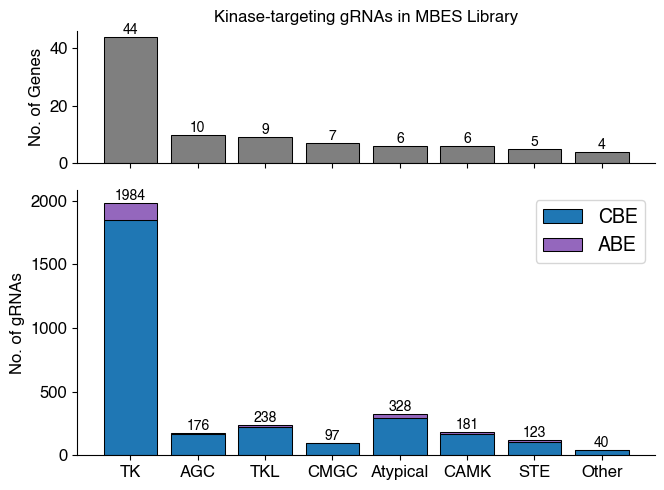

In [ ]:
comb3 = comb2.sort_values(by='No. of Genes', ascending=False).reset_index(drop=True)

fig, ax= plt.subplots(2,1,figsize=(6.75,5), height_ratios=[1,2], sharex=True)

ax[0].bar(comb3['Group'], comb3['No. of Genes'], color='tab:grey', linewidth=.75, edgecolor='black')

ax[1].bar(comb3['Group'], comb3['No. gRNAs CBE'], color='tab:blue',linewidth=.75, edgecolor='black', label='CBE')
ax[1].bar(comb3['Group'], comb3['No. gRNAs ABE'], color='tab:purple', bottom=comb3['No. gRNAs CBE'],linewidth=.75, edgecolor='black', label='ABE')
ax[1].legend(fontsize=14, loc='upper right')

ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=12)

ax[0].set_ylabel('No. of Genes', fontsize=12)
ax[1].set_ylabel('No. of gRNAs', fontsize=12)
ax[0].set_title('Kinase-targeting gRNAs in MBES Library', fontsize=12)

for i, val in comb3.iterrows():
    ax[0].text(i, val['No. of Genes'], str(val['No. of Genes']), ha='center', va='bottom')
    ax[1].text(i, val['No. gRNAs CBE'] + val['No. gRNAs ABE'], str(int(val['No. gRNAs CBE'] + val['No. gRNAs ABE'])), ha='center', va='bottom')

fig.tight_layout()
#fig.savefig('figures/kinase_representation.pdf')


# Selecting Kinase-targeting gRNAs that are enriched in vivo

Can also look at depletion if desired.


In [355]:
#node size = # of gRNAs
kinase_subset = library[library['gene_name_h'].isin(kinases_included)]

u,c = np.unique(kinase_subset['gene_name_h'], return_counts=True)

for i in range(len(u)):
    print(u[i], c[i])

ABL1 23
ACVR1 22
AKT1 23
AKT2 16
AKT3 19
ALK 73
ARAF 39
ATM 90
ATR 44
AURKA 6
AURKB 10
AXL 45
BCR 4
BMPR1A 16
BRAF 41
BRD4 70
BTK 26
CDK12 38
CDK4 8
CDK6 4
CDK8 20
CHEK1 1
CHEK2 17
CSF1R 27
DDR2 37
EGFR 68
EPHA3 85
EPHA5 82
EPHA7 87
EPHB1 82
ERBB2 52
ERBB3 69
ERBB4 81
FGFR1 32
FGFR2 60
FGFR3 49
FGFR4 36
FLT1 19
FLT3 25
FLT4 86
FYN 28
GSK3B 12
IGF1R 43
IKBKE 11
INSR 60
JAK1 53
JAK2 19
JAK3 25
KDR 59
KIT 34
KSR2 6
LATS1 32
LATS2 21
LCK 2
LYN 13
MAP2K1 19
MAP2K2 19
MAP2K4 35
MAP3K1 33
MAP3K13 33
MAPK1 8
MAPK3 7
MET 42
MST1R 13
MTOR 119
NTRK1 38
NTRK2 46
NTRK3 82
PAK1 17
PDGFRA 56
PDGFRB 50
PDPK1 2
PIM1 56
PLK2 13
PRKCI 6
PRKD1 34
RAF1 17
RET 28
ROS1 53
RPS6KA4 46
RPS6KB2 8
SGK1 3
SMG1 1
SRC 26
STK11 56
STK40 17
SYK 29
TEK 34
TGFBR1 36
TGFBR2 28
YES1 7


In [356]:
for i in range(len(u)):
    print(u[i])

ABL1
ACVR1
AKT1
AKT2
AKT3
ALK
ARAF
ATM
ATR
AURKA
AURKB
AXL
BCR
BMPR1A
BRAF
BRD4
BTK
CDK12
CDK4
CDK6
CDK8
CHEK1
CHEK2
CSF1R
DDR2
EGFR
EPHA3
EPHA5
EPHA7
EPHB1
ERBB2
ERBB3
ERBB4
FGFR1
FGFR2
FGFR3
FGFR4
FLT1
FLT3
FLT4
FYN
GSK3B
IGF1R
IKBKE
INSR
JAK1
JAK2
JAK3
KDR
KIT
KSR2
LATS1
LATS2
LCK
LYN
MAP2K1
MAP2K2
MAP2K4
MAP3K1
MAP3K13
MAPK1
MAPK3
MET
MST1R
MTOR
NTRK1
NTRK2
NTRK3
PAK1
PDGFRA
PDGFRB
PDPK1
PIM1
PLK2
PRKCI
PRKD1
RAF1
RET
ROS1
RPS6KA4
RPS6KB2
SGK1
SMG1
SRC
STK11
STK40
SYK
TEK
TGFBR1
TGFBR2
YES1


In [ ]:
ABE = pd.read_csv('ABE_LFC_FDR_df.csv')
CBE = pd.read_csv('CBE_LFC_FDR_df.csv')

ABE['Editor']='ABE'
CBE['Editor']='CBE'

lfc_fdr = pd.concat((ABE, CBE))

kinase_lfc = lfc_fdr[lfc_fdr['gene_name_h'].isin(kinases_included)]


fdr_cutoff = .1
lfc_cutoff = 1
min_input_counts = 2
min_targ_edit = 20

tissues = ['spleen', 'bonemarrow', 'meninges']

s_holder = []

for tissue in tissues:
    subset1 = kinase_lfc[(kinase_lfc[f'FDR_{tissue}']<fdr_cutoff) & (kinase_lfc[f'LFC_median_{tissue}']>lfc_cutoff) & (kinase_lfc['Input_median']>=min_input_counts) & (kinase_lfc['target_base_edit_perc']>=min_targ_edit)]
    s_holder.append(subset1)
#u, c = np.unique(subset['gene_name_h'], return_counts=True)

#for i in range(len(u)):
   # print(u[i], c[i])
c1 = pd.concat(s_holder).drop_duplicates()
len(c1)

113

In [353]:
u, c = np.unique(c1['gene_name_h'], return_counts=True)
for i in range(len(u)):
    print(u[i], c[i])


ACVR1 1
AKT1 1
ARAF 1
ATM 2
ATR 1
AXL 2
BRAF 1
BRD4 3
BTK 2
CDK12 2
CDK4 1
CDK6 1
CHEK2 1
CSF1R 1
EGFR 5
EPHA5 4
EPHA7 3
EPHB1 5
ERBB2 1
ERBB3 7
FGFR1 1
FGFR2 1
FGFR3 2
FLT1 1
FLT3 1
FLT4 4
GSK3B 1
IGF1R 1
IKBKE 2
INSR 1
JAK1 3
JAK3 1
KIT 2
LATS1 3
LATS2 1
LCK 2
LYN 1
MAP2K1 2
MAP2K2 2
MAP3K1 4
MAPK1 1
MTOR 4
NTRK2 1
NTRK3 5
PAK1 1
PDGFRA 1
PDGFRB 2
RAF1 2
RET 2
ROS1 2
RPS6KA4 4
SRC 1
SYK 1
TEK 1
TGFBR1 1
TGFBR2 3


In [463]:
def barplotter(subset, save_name, figtitle, figwidth=12.5, figheight=4.5, save=False):
    """ 
    Function for making barplots/stripplots showing editing percentage in all tissues

    """

    t1 = subset.fillna('Non-coding')

    CBE_samp_dict = {'spleen':['spleen1','spleen2','spleen3','spleen4','spleen5','spleen6','spleen7','spleen8','spleen9'],
    'bonemarrow':['bonemarrow1','bonemarrow2','bonemarrow3','bonemarrow4','bonemarrow5','bonemarrow6','bonemarrow7','bonemarrow8','bonemarrow9','bonemarrow10'],
    'meninges':['meninges1','meninges2','meninges3','meninges4','meninges5','meninges6','meninges7','meninges8','meninges9','meninges10',],
    'd5':['d5_rep1','d5_rep2','d5_rep3'],
    'd15':['d15_rep1','d15_rep2','d15_rep3'],
    'plasmid_lib':['plasmidlib']}

    ABE_samp_dict = {'spleen':['spleen1','spleen2','spleen3','spleen4'],
    'bonemarrow':['bonemarrow1','bonemarrow2','bonemarrow3','bonemarrow4','bonemarrow5'],
    'meninges':['meninges1','meninges2','meninges3','meninges4','meninges5'],
    'd5':['d5_rep1','d5_rep2','d5_rep3'],
    'd15':['d15_rep1','d15_rep2','d15_rep3'],
    'plasmid_lib':['plasmidlib']}

    samples2 = ['d15', 'spleen', 'bonemarrow', 'meninges']

    name = []
    tissue = []
    LFC = []
    gRNA_id = []

    xlabs = []
    for i, val in t1.iterrows():
        
        a = val['HGNC_Name']
        b = val['HGVSp_h']
        c = val['gene_name_m_corrected']
        d = val['HGVSp_m']

        if b[:2]=='p.':
            b = b[2:]
        if 'delins' in b:
            b = b.replace('delins', '')
        if d=='Not calculated (legacy)':
            d = b
        

        editor = val['Editor']

        n = f'{a} {b}\n{c} {d}'

        xlabs.append(n)
        for s in samples2:

            if editor=='ABE':
                samps = ABE_samp_dict[s]
            elif editor=='CBE':
                samps = CBE_samp_dict[s]

            for j in samps:
                LFC.append(val[j])
                name.append(n)
                tissue.append(s)
                gRNA_id.append(val['gRNA_id'])
        


    plotting_df = pd.DataFrame(dict(zip(['gRNA_id', 'Mutation', 'Tissue', 'LFC'], [gRNA_id, name, tissue, LFC])))
        
    fig, ax = plt.subplots(2,1, figsize=(figwidth,figheight), height_ratios=[1,7], sharex=False)

    palette = ['#F9CBA8', '#ED6A50', '#7284A1', 'lightgrey', 'darkslategray']

    palette = ['lightgrey','cadetblue','slateblue','lightcoral', '#ED6A50',]

    sns.heatmap([np.asarray(t1['target_base_edit_perc'])], ax=ax[0], cbar=False, cmap='Reds', linewidth=1, annot=True, annot_kws={"fontsize":12}, vmin=0, vmax=100,fmt='.3g')
    g = sns.boxplot(data=plotting_df, x='gRNA_id', y='LFC', hue='Tissue', ax=ax[1], legend=False, palette=palette, showfliers=False)
    sns.stripplot(data=plotting_df, x='gRNA_id', y='LFC', hue='Tissue', ax=ax[1], dodge=True, edgecolor='black', linewidth=1, legend=False, palette=palette)

    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].set_xticklabels(xlabs)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('LFC', fontsize=12)

    #ax[1].plot([0,8], [0,0], color='black', linestyle='dashed')
    ax[1].spines[['top', 'right']].set_visible(False)
    ax[1].tick_params(axis='x', which='major', labelsize=10)
    ax[1].tick_params(axis='y', which='major', labelsize=12)

    color_dict = {'ABE':'tab:purple', 'CBE':'tab:blue'}
    t2 = list(t1['Editor'])
    for idx, tick_label in enumerate(g.axes.get_xticklabels()):

        tick_label.set_color(color_dict[t2[idx]])


    ax[1].axhline(0, linestyle='dashed', color='black', linewidth=.5)

    for k in range(len(t1)-1):
        ax[1].axvline(k+.5, linestyle='dashed', color='black', linewidth=.5)

    ax[0].set_title(f'{figtitle}', fontsize=14)

    fig.tight_layout()
    fig.subplots_adjust(hspace=0)
    if save==True:
        fig.savefig(f'figures/{save_name}.pdf')

In [414]:
c1 = c1.rename(columns={'gene_name_h':'HGNC_Name'})

c2 = pd.merge(c1, kins, on='HGNC_Name')


In [415]:
u,c = np.unique(c2['Group'], return_counts=True)
dict(zip(u,c))

{'AGC': 9,
 'Atypical': 10,
 'CAMK': 1,
 'CMGC': 6,
 'Other': 2,
 'STE': 9,
 'TK': 67,
 'TKL': 9}

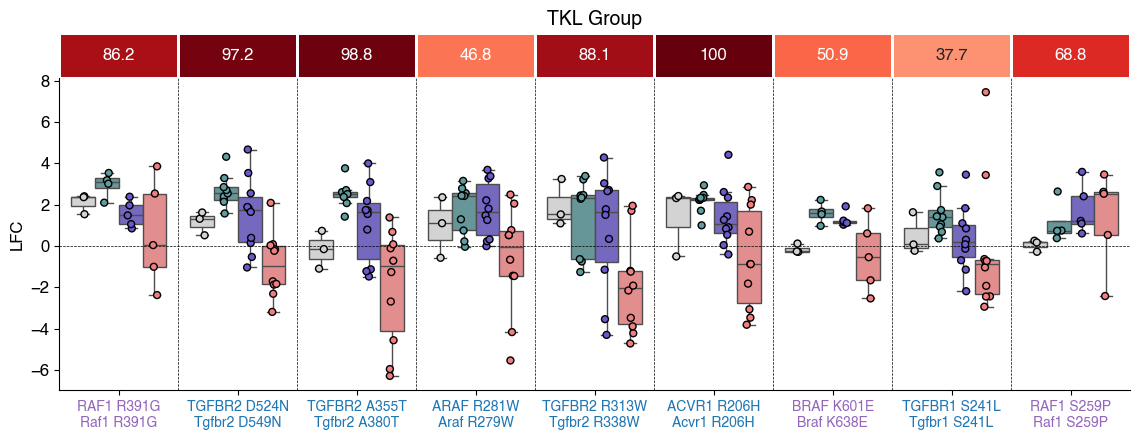

In [467]:
group = 'TKL'
c3 = c2[c2['Group']==group]
c3 = c3.sort_values(by='LFC_median_spleen', ascending=False)[:10]
barplotter(c3, f'{group}_box', f'{group} Group', figheight=4.5, figwidth=11.5,save=True)

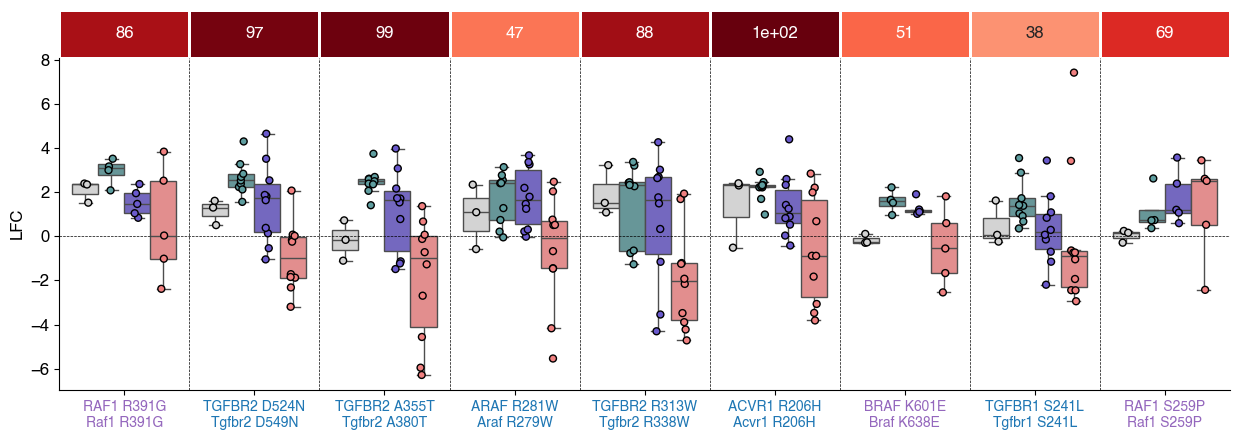

In [450]:
barplotter(c3, 'CMGC_box', figheight=4.5, figwidth=12.5,save=False)